In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


alpha=2.5
v=0.03
l=10
F0=1
n=50
sigma=0.01

def phi(w):
    if w <= 0:
      return 0
    else:
      return (F0-sigma)/(1.0 + w/(1.0-sigma))

def f(r,t):

    U_i=r[:n]
    omega_i=r[n:]

    fU_i = np.empty(n,float)
    fomega_i = np.empty(n,float)

    fU_i[0] = omega_i[0]
    s0 = (l**2)*(U_i[1]-U_i[0]) - U_i[0]
    if (omega_i[0] <= -v +v*0.01 and s0 <= F0):
      omega_i[0] = -v
      fomega_i[0] = 0
    else:
      fomega_i[0] = s0 - phi(2*alpha*v + 2*alpha*omega_i[0])

    for j in range(1,n-1):
      fU_i[j] = omega_i[j]
      s = (l**2)*(U_i[j+1]-2*U_i[j]+U_i[j-1]) - U_i[j]
      if (omega_i[j] <= -v +v*0.01 and s <= F0):
        omega_i[j] = -v
        fomega_i[j] = 0
      else:
        fomega_i[j] = s - phi(2*alpha*v + 2*alpha*omega_i[j])

    fU_i[n-1] = omega_i[n-1]
    sn = -(l**2)*(U_i[n-1]-U_i[n-2]) - U_i[n-1]
    if (omega_i[n-1] <= -v +v*0.01 and  sn <= F0) :
      omega_i[n-1] = -v
      fomega_i[n-1] = 0
    else:
      fomega_i[n-1] = sn - phi(2*alpha*v + 2*alpha*omega_i[n-1])

    return np.concatenate([fU_i,fomega_i])

a = 0
b = 50
N = 5000
h = (b-a)/N

PV = [] #Crea una lista de listas donde se almacenarán los valores de las posiciones y velocidades.
for i in range(2*n):
    PV.append([])

tpoints = np.arange(a,b,h)
'''
def vect(a,b,n):     #Función que ingresa vectores aleatorios
    vector=[]
    for i in range(n):
        vector.append(np.random.uniform(a,b))
    return vector
pi = np.array(vect(0,-0.05,n),float)
'''
#vi=np.zeros([n],float)
vi=[]
for i in range(n):
  vi.append(-v)

pi=np.array([0.72235592, 0.72527066, 0.72073047, 0.72718423, 0.74222829,
       0.72199864, 0.69734455, 0.66574554, 0.6425    , 0.62975995,
       0.62518657, 0.63009794, 0.6491877 , 0.63167216, 0.62262983,
       0.62694293, 0.63249141, 0.64006295, 0.63722845, 0.63748212,
       0.64138662, 0.63760384, 0.61265397, 0.59169306, 0.56731753,
       0.54948587, 0.53332961, 0.52064954, 0.5141297 , 0.51591324,
       0.52028049, 0.5352349 , 0.55488192, 0.57301198, 0.57946483,
       0.59932144, 0.62523277, 0.65973409, 0.68181637, 0.67279208,
       0.66907526, 0.67654546, 0.68681001, 0.68174304, 0.67244414,
       0.66579544, 0.66101583, 0.65889264, 0.66595632, 0.66624099])

r=np.concatenate([pi,vi])

for t in tpoints:
    for i in range(2*n):
        PV[i].append(r[i])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

posiciones = []
for i in range(n):
    posiciones.append([])
    for j in range(len(tpoints)):
        posiciones[i].append(i)

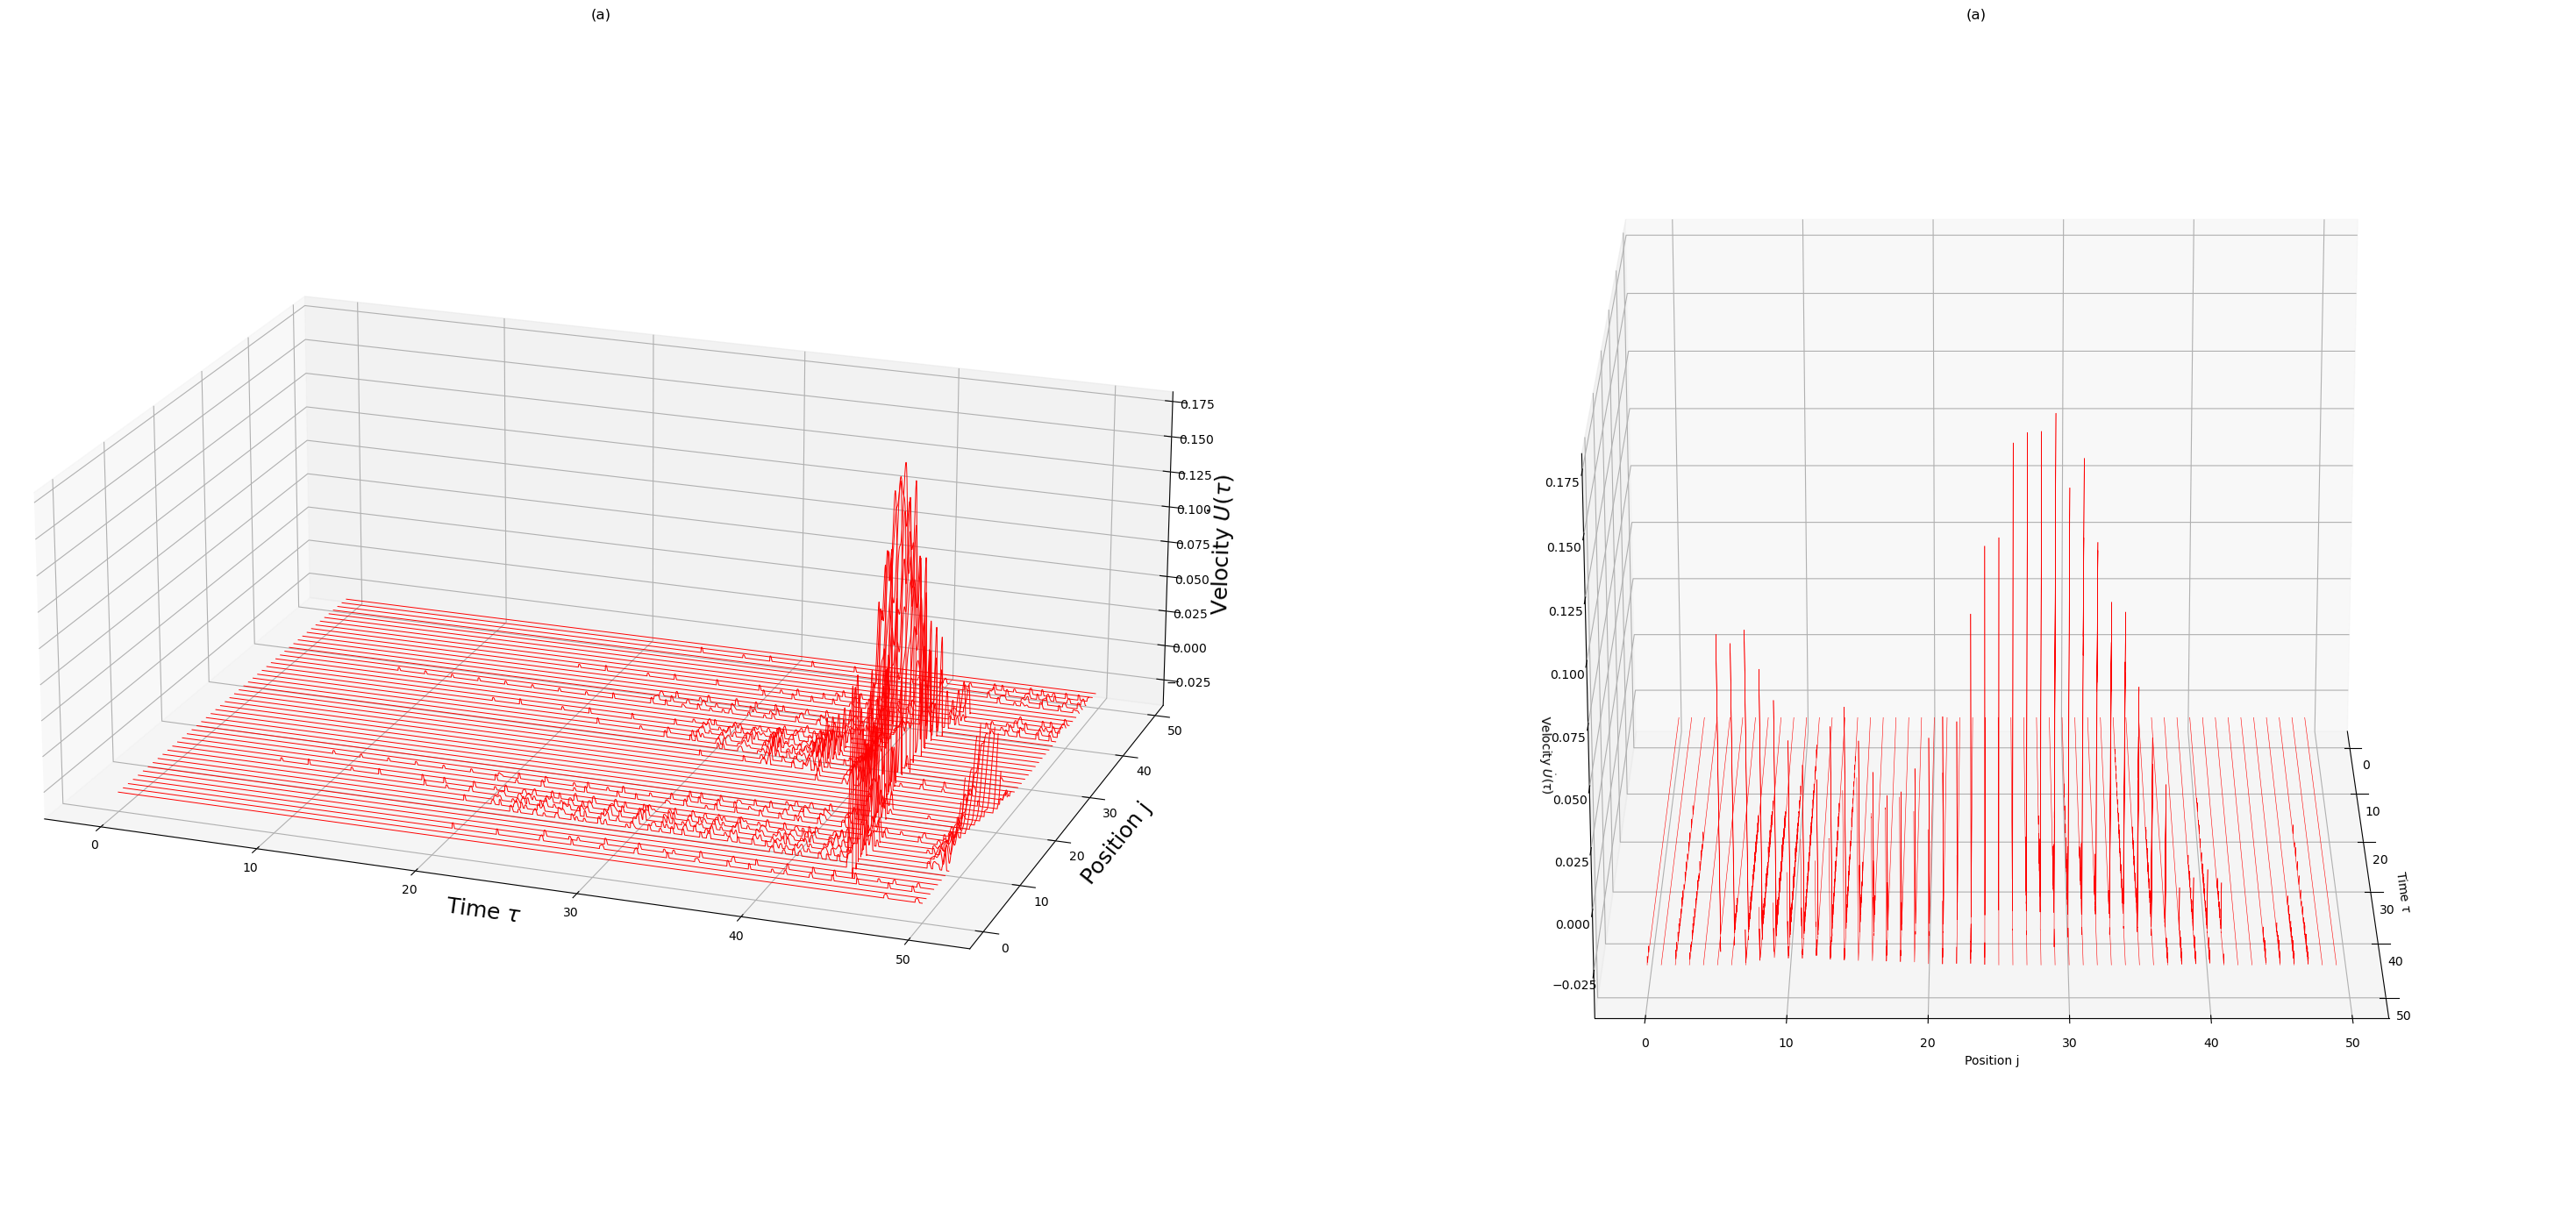

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np




# Create a figure with three subplots
fig = plt.figure(figsize=(32, 14))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
for i in range(n):
    ax1.plot3D(tpoints,posiciones[i],PV[n+i],color="red",linewidth=0.7)
# Experiment with different view angles if needed
ax1.view_init(20, 290)
ax1.set_xlabel("Time $\\tau$",fontsize=18)
ax1.set_ylabel("Position j",fontsize=18)
ax1.set_zlabel("Velocity $\\dot{U}(\\tau) $",fontsize=18)
plt.title("(a)")
ax1.set_box_aspect([1.4, 1, 0.5])

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
for i in range(n):
    ax2.plot3D(tpoints,posiciones[i],PV[n+i],color="red",linewidth=0.4)
# Experiment with different view angles if needed
ax2.view_init(20, 0)
ax2.set_xlabel("Time $\\tau$")
ax2.set_ylabel("Position j")
ax2.set_zlabel("Velocity $\\dot{U}(\\tau) $")
plt.title("(a)")
#ax2.set_box_aspect([1.4, 1, 0.4])


# Adjust the layout
plt.tight_layout()

# Show the plots
#plt.show()

#plt.savefig('tipoa.png',dpi=300)
#files.download('tipoa.png')